# ***Webscraping Led Zeppelin's Concert History with Selenium***

For scientific purposes only. 

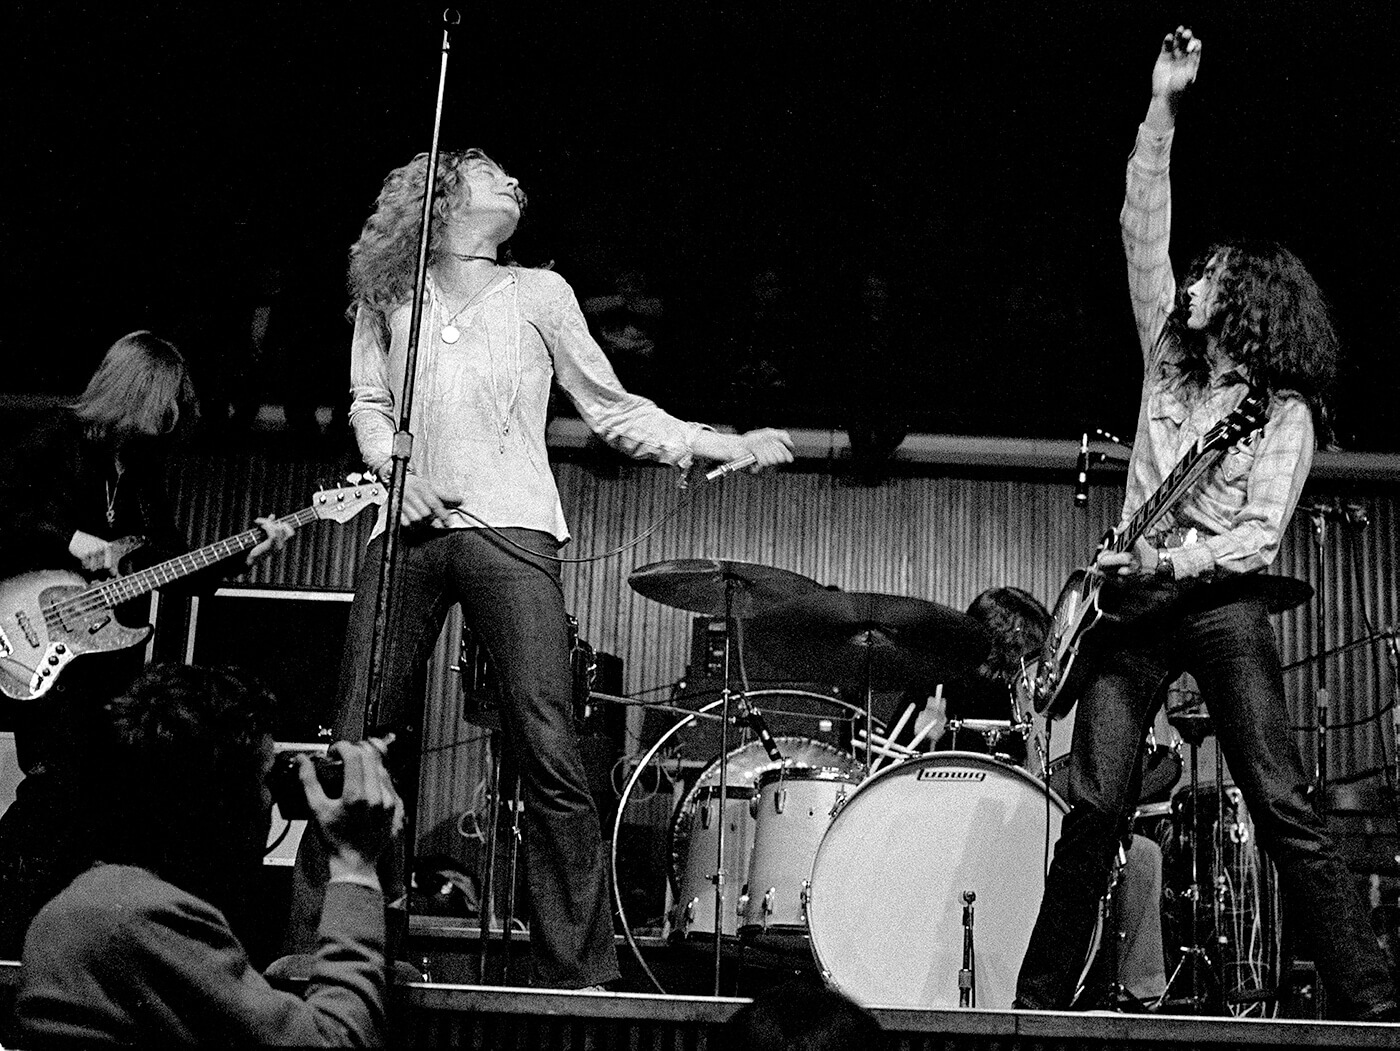

In [15]:
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from operator import itemgetter
import pandas as pd
import numpy as np
import string
from datetime import date
from datetime import datetime
import geopandas
import matplotlib.pyplot as plt

In [2]:
def zep_scrap(url):
    url = url
    print(f"Getting Entries in: {url}")
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.maximize_window()
    driver.get(url)
    #this particular site had a cookie so i'm clicking on it
    cookie = driver.find_element('xpath','//button[@id="onetrust-accept-btn-handler"]')
    try:
        cookie.click()
    except:
        pass
    #creating empty lists to store content
    concert_list = []
    dates = []
    venues =[]
    entry_items_list = driver.find_elements('xpath', '/html/body/div[1]/div/div/div[2]/div/div[1]/div/main/section/div/div[2]/div/div/div/div')[0]
    
    for i in entry_items_list.find_elements('xpath', "//span[@class='field-content']"): #dates xpath
        dates.append(i.text)
    for i in entry_items_list.find_elements('xpath', "//div[@class='field-content']"): #venues xpath
        venues.append(i.text)
    df = pd.DataFrame(columns = ["Date", "Venue"])
    dates = pd.Series(dates, name='Date')
    venues = pd.Series(venues, name='Venue')
    df = df.append(pd.concat([dates,venues], axis=1))

    return df

In [3]:
#the page i'm scraping data from had multiple pages in the form of url + "?page=" + page number 
def scrape(url):
    url = url + "?page="
    df = pd.DataFrame(columns = ["Date", "Venue"])
    i = 0
    while i<21:
        try:
            df = df.append(zep_scrap(url + str(i)))
            print(f"Page: {i+1}")
            i += 1
        except:
            break
    
    df = df.reset_index(drop=True)
    df.to_csv(r"C:\Users\Topcu\Desktop\zep-scrape\zep.csv")
    return df

In [4]:
scrape("https://www.ledzeppelin.com/shows/all")

Getting Entries in: https://www.ledzeppelin.com/shows/all?page=0


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 1
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=1


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 2
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=2


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 3
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=3


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 4
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=4


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 5
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=5


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 6
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=6


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 7
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=7


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 8
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=8


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\2816296135.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 9
Getting Entries in: https://www.ledzeppelin.com/shows/all?page=9


C:\Users\Topcu\AppData\Local\Temp\ipykernel_32924\3697598539.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


,Date,Venue
0,"September 7, 1968","Teen-Clubs, Box 45, Egegaard Skole"
1,"September 7, 1968","Brondby Pop-Club, Norregardsskolen"
2,"September 8, 1968",Reventlowparken
3,"September 8, 1968",Fjordvilla Club
4,"September 8, 1968",Teaterbygningen
...,...,...
220,"April 23, 1970",BBC TV Lime Grove Studios
221,"June 22, 1970",Laugardalsholl Hall
222,"June 28, 1970",Bath Festival - West Showground
223,"July 16, 1970",Sporthalle


In [8]:
df = pd.read_csv(r"C:\Users\Topcu\Desktop\zep-scrape\zep.csv")
df.head()


,Unnamed: 0,Date,Venue
0,0,"September 7, 1968","Teen-Clubs, Box 45, Egegaard Skole"
1,1,"September 7, 1968","Brondby Pop-Club, Norregardsskolen"
2,2,"September 8, 1968",Reventlowparken
3,3,"September 8, 1968",Fjordvilla Club
4,4,"September 8, 1968",Teaterbygningen


In [12]:
#changing date column to datetime
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Unnamed: 0,Date,Venue
0,0,1968-09-07,"Teen-Clubs, Box 45, Egegaard Skole"
1,1,1968-09-07,"Brondby Pop-Club, Norregardsskolen"
2,2,1968-09-08,Reventlowparken
3,3,1968-09-08,Fjordvilla Club
4,4,1968-09-08,Teaterbygningen


In [18]:
import geocoder
import requests

In [19]:
with requests.Session() as session:
    for address in df["Venue"]:
        coo = geocoder.osm(address, session=session)
        if coo:
            df.loc[df["Venue"] == address, "Long"] = round(coo.osm["x"], 2)
            df.loc[df["Venue"] == address, "Lat"] = round(coo.osm["y"], 2)

print(df)

     Unnamed: 0       Date                               Venue   Long    Lat
0             0 1968-09-07  Teen-Clubs, Box 45, Egegaard Skole    NaN    NaN
1             1 1968-09-07  Brondby Pop-Club, Norregardsskolen    NaN    NaN
2             2 1968-09-08                     Reventlowparken    NaN    NaN
3             3 1968-09-08                     Fjordvilla Club    NaN    NaN
4             4 1968-09-08                     Teaterbygningen  12.19  55.46
..          ...        ...                                 ...    ...    ...
220         220 1970-04-23           BBC TV Lime Grove Studios    NaN    NaN
221         221 1970-06-22                 Laugardalsholl Hall    NaN    NaN
222         222 1970-06-28     Bath Festival - West Showground    NaN    NaN
223         223 1970-07-16                          Sporthalle  13.38  52.44
224         224 1970-07-17                          Grugahalle   7.00  51.43

[225 rows x 5 columns]


In [42]:
df.columns

Index(['Unnamed: 0', 'Date', 'Venue', 'Long', 'Lat'], dtype='object')

In [46]:
point = df.copy()
point.dropna(inplace=True)

In [48]:
#created points for each concert to map them 
gdf = geopandas.GeoDataFrame(point, geometry=geopandas.points_from_xy(point.Long, point.Lat))

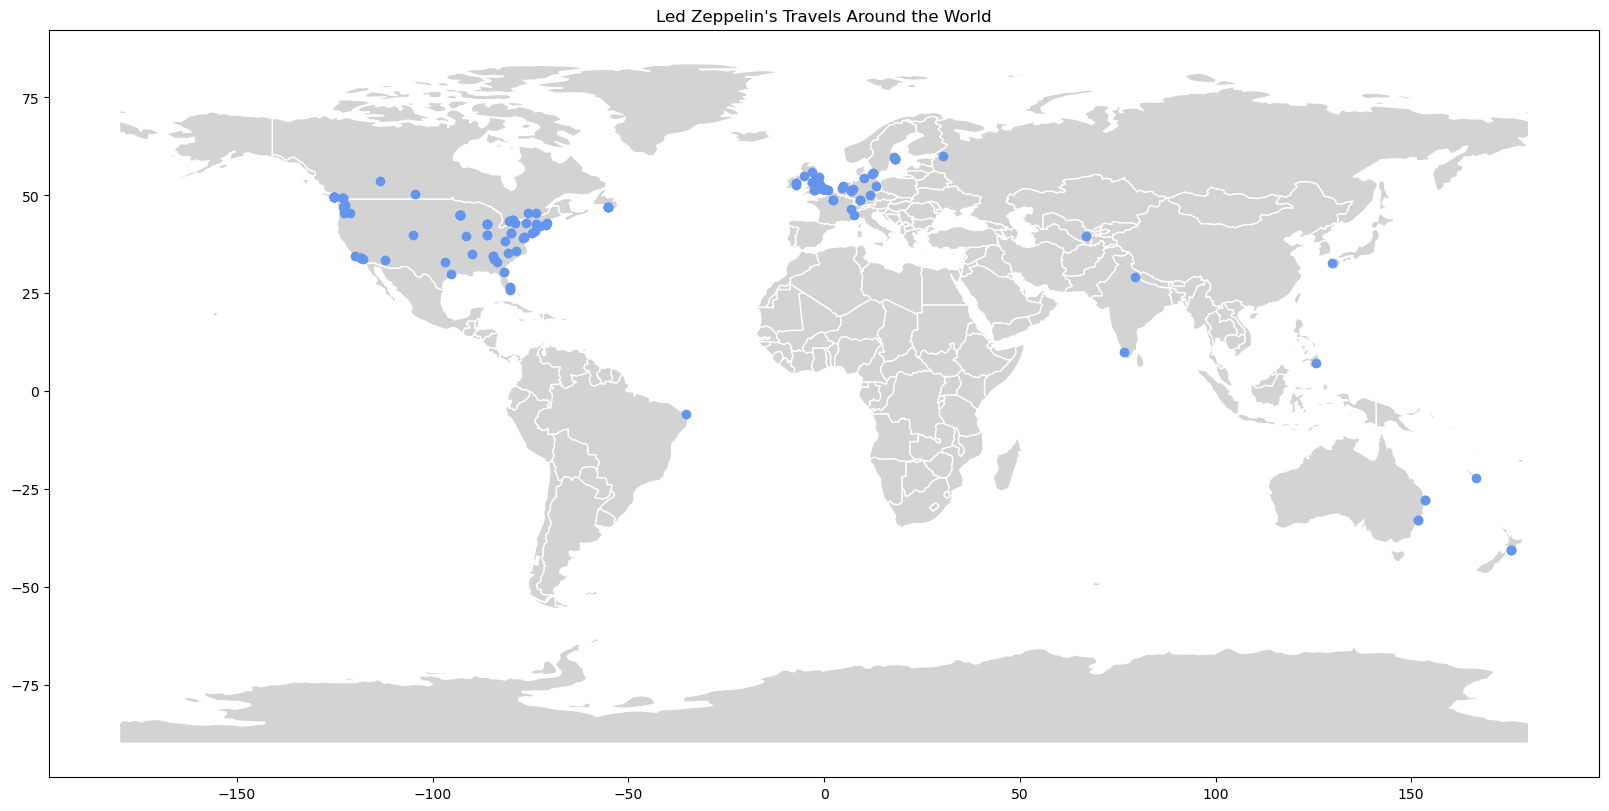

In [109]:
#wow!
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America
ax = world.plot(color='lightgrey', edgecolor='white',figsize=(20,20))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='cornflowerblue')
plt.title("Led Zeppelin's Travels Around the World")
plt.show()